# Euler's method

The simplest numerical method. We want to solve the IVP

$$ \frac{dy}{dt} = f(t,y) $$

at $y(t_0) = y_0$.

We start with the equation of the line tangent to the solution curve, where the slope m is simply $f(t,y)$ and the step size $h = (t-t_0)$

$$ y(t) = y_0 + m (t-t_0) = y_0 + h f(t,y)$$

And more generally, for the next approximated point we have Euler's method

$$ y_{n+1} = y_n + h f(t_n, y_n) $$

## Example 

Suppose we want to solve 

$$ y' = 2 - 2y - e^{-4t} $$

for y(0) = 1. Let's do it in python, first step by step and then more programatically. To check that our Euler method approximation is correct, we can compare it to the exact solution: 

$$ y = 1 + \frac{1}{2} e^{-4t} - \frac{1}{2} e^{-2t} $$

In [1]:
import numpy as np
import plotly.graph_objects as go
from collections.abc import Callable

In [45]:
# define our function from y'
def f(t, y):
    return 2 - 2*y - np.exp(-4*t)

# exact solution
def exact_f(t):
    return 1 + 1/2 * np.exp(-4*t) - 1/2 * np.exp(-2*t)

# initial conditions
y0 = 1
t0 = 0 
step = 0.1

# crank out the next point for the Euler method's first step
y1 = y0 + step * f(t0, y0)
print(y1)

0.9


In [46]:
# second step in Euler method
t1 = t0 + step
y2 = y1 + step * f(t1, y1)
print(y2)

0.8529679953964361


In [47]:
# third step in Euler method
t2 = t1 + step
y3 = y2 + step * f(t2, y2)
print(y3)

0.8374414999054267


In [48]:
# now, more programatically we can define a function that does this for us for any function
def euler(f: Callable[[float, float], float], t: list[float], y0: float, h: float):
    """
    Euler method.

    Args:
        f: Function representing dy/dt = f(t, y)
        t: List [t_start, t_end] defining the time interval to solve over
        y0: Initial condition
        h: Step size
    
    Returns:
        times: numpy array of time points from t_start to t_end with spacing h.
        y: numpy array of approximate solution values at each time point.
    """
    n = int((t[1] - t[0]) / h)
    times, y = np.zeros(n + 1), np.zeros(n + 1)
    times[0] = t[0]
    y[0] = y0

    for i in range(n):
        y[i+1] = y[i] + h * f(times[i], y[i])
        times[i+1] = times[i] + h

    return times, y
    
times, sol = euler(f, [0, 10], y0, 0.1)

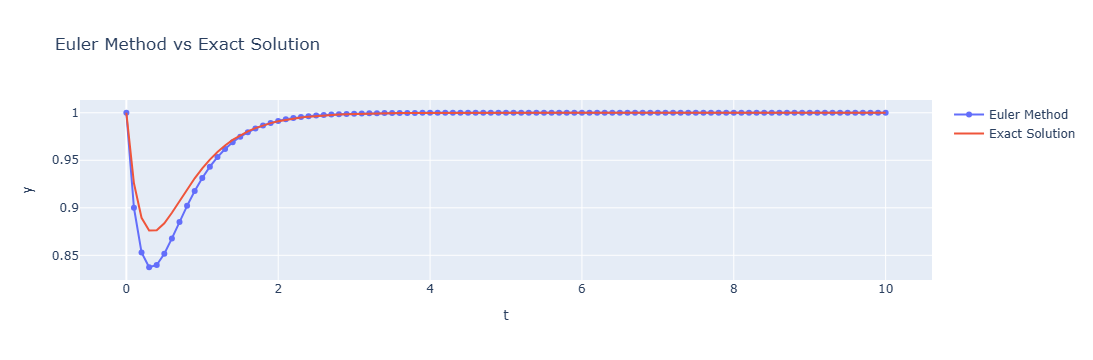

In [50]:
# plot our approximation vs exact solution
y_exact = exact_f(times)

fig = go.Figure()

# Euler's method
fig.add_trace(go.Scatter(x=times, y=sol, 
                         mode='lines+markers', name='Euler Method'))

# exact solution
fig.add_trace(go.Scatter(x=times, y=y_exact, 
                         mode='lines', name='Exact Solution'))

fig.update_layout(title='Euler Method vs Exact Solution',
                  xaxis_title='t',
                  yaxis_title='y')
fig.show()

# Runge-Kutta

Euler's method is a bit too elementary for real world astrodynamics work, and the next step up in our numerical integration journey is Runge-Kutta. A nice feature of Runge-Kutta of various orders is that they reduce to the Euler method when their weights are set to the correct values. We'll be using RK4, the 4th order Runge-Kutta, which has been nicely [derived here](https://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node5.html).

RK4 involves computing

$$ y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$ 

where the weights $ k_1, ... , k_4 $ are given by

\begin{align}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right) \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right) \\
k_4 &= f(t_n + h, y_n + hk_3) \\
\end{align}

Note that changing the weights from $ [\frac{1}{6}, \frac{2}{6}, \frac{2}{6}, \frac{1}{6}] $ to $ [1, 0, 0, 0 ] $ gets us back the Euler method, as expected

\begin{align} 
y_{n+1} &= y_n + h ( k_1 + 0 * k_2 + 0 * k_3 + 0 * k_4) \\ 
&= y_n + h k_1 \\ 
&= y_n + h f(t_n, y_n) \\
\end{align}

We can write RK4 just as we wrote Euler, reusing the type hints:

In [51]:
def RK4(f: Callable[[float, float], float], t: list[float], y0: float, h: float):
    """
    RK4 method.

    Args:
        f: Function representing dy/dt = f(t, y)
        t: List [t_start, t_end] defining the time interval to solve over
        y0: Initial condition
        h: Step size
    
    Returns:
        times: numpy array of time points from t_start to t_end with spacing h.
        y: numpy array of approximate solution values at each time point.
    """
    n = int((t[1] - t[0]) / h)  
    times, y = np.zeros(n + 1), np.zeros(n + 1) 
    times[0] = t[0] 
    y[0] = y0
    
    for i in range(n):
        # compute weights
        k1 = f(times[i], y[i])
        k2 = f(times[i] + h/2, y[i] + h*k1/2)
        k3 = f(times[i] + h/2, y[i] + h*k2/2)
        k4 = f(times[i] + h, y[i] + h*k3)
        
        # weighted average
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        times[i+1] = times[i] + h
    
    return times, y

In [53]:
times, sol = RK4(f, [0, 10], y0, 0.1)

We really should write a plotter function now that we're reusing code. But more importantly, see how RK4 better approximates the exact solution around the area where Euler had significant residuals (namely, where the solution was changing more rapidly). 

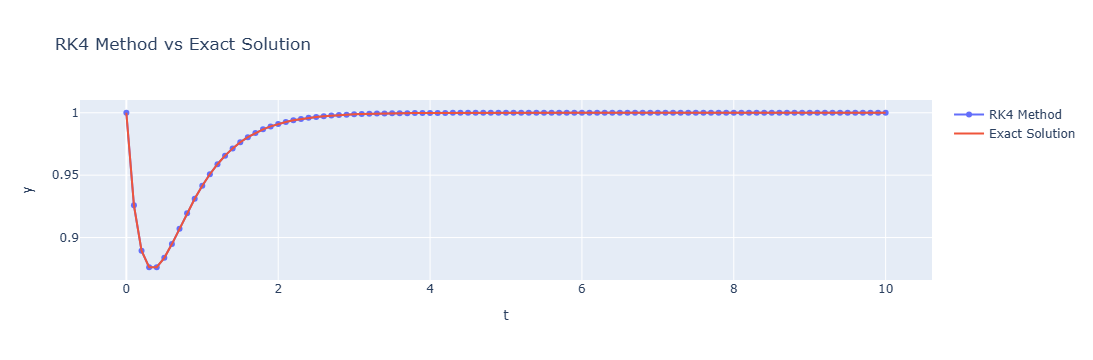

In [57]:
y_exact = exact_f(times)

fig = go.Figure()

# RK4 method
fig.add_trace(go.Scatter(x=times, y=sol, 
                         mode='lines+markers', name='RK4 Method'))

# exact solution
fig.add_trace(go.Scatter(x=times, y=y_exact, 
                         mode='lines', name='Exact Solution'))

fig.update_layout(title='RK4 Method vs Exact Solution',
                  xaxis_title='t',
                  yaxis_title='y')
fig.show()

# Numerically Integrating Second Order Differential Equations

In astrodynamics, as well as in engineering and physics more broadly, we're often dealing with derivatives of the 2nd order or higher. For example, Newton's second law (when the system's mass is invariant)

$$ \textbf{F} = m \textbf{a} = m \frac{d^2 \textbf{r}}{dt}$$

involves a second derivative of the position vector. When we plug in the forces, we can't just naively throw it into Euler or RK4 to get the future state vector. Instead, we need to convert $ \frac{d^2\textbf{r}}{dt^2} = \frac{F}{m}$ into two first order equations.


\begin{align}
\frac{d\textbf{r}}{dt} &= \textbf{v} \\
\textbf{a} = \frac{d\textbf{v}}{dt} &= \frac{F(t, \textbf{r}, \textbf{v})}{m}
\end{align}

Now, suppose we're studying a purely gravitational, two body system, such as projectile motion on Earth without drag, or a spacecraft in a Keplerian orbit. The acceleration of the projectile or spacecraft has the form

$$ \textbf{a} = - \frac{\mu }{r^3} \textbf{r} $$

where the gravitational parameter, $\mu$, is just $\mu = GM$. This is no different from the usual scalar form of Newton's universal law of gravitation

$$ F = - \frac{GMm}{r^2} $$

except that we (1) expressed it in vector form using the unit vector $ \hat{r} = \frac{\textbf{r}}{r} $ and (2) took the liberty of using Newton's second law, substituting $ m\textbf{a} $ for $\textbf{F}$ and dividing through by m. 

As two first order equations, we then have

\begin{align}
\frac{d\textbf{r}}{dt} &= \textbf{v} \\
\frac{d\textbf{v}}{dt} &= - \frac{\mu }{r^3} \textbf{r}
\end{align}

Let's write a python function encoding this so we can apply our numerical integation techniques to it. We'll start by being given the initial state vector $ (r_0, v_0) $ and we'll integrate with respect to time to get the state vector at any future time we care about. This is how orbits are propagated if we ignore perturbations!

In [62]:
# ideal equation of motion for a body gravitating in a two body system
def eom(t, state, mu):
    """
    Args:
        t: time stamp
        state: 3 positions, 3 velocities in a list
        mu: gravitational parameter of the central body
    
    Returns:
        sol: first 3 elements are dr/dt, last 3 elements are dv/dt
    """
    # unpack position and velocity
    r, v = state[:3], state[3:]

    # initialize solution
    sol = np.zeros(len(state))
    sol[:3] = v # this encodes dr/dt = v

    # the denominator is the magntiude of position!
    r_mag = np.linalg.norm(r)

    a = - mu * r / r_mag**3 # note that in multiplying by r, we get a vector of length 3 for a
    sol[3:] = a
    return sol

## ISS trajectory example
I grabbed the ISS's state from an OEM published by NASA, rather than grabbing the TLE from celestrak/spacetrack and converting it into the Cartesian state. The state will typically be expressed in an ECEF, or earth centered earth fixed frame, whose origin is at the Earth's center of mass. So we can check its approximate altitude as a sanity check by subtracting the Earth's radius from the magnitude of its position vector. 

In [101]:
# Initial conditions for the Earth and ISS
G = 6.6743e-11 # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24 # Earth's mass (kg)

# Note: we divide by 1e9 to convert from m^3 to km^3
mu = G * M / 1e9 # Earth's Gravitational parameter (km³/s²).
R_E = 6371 # Earth radius km
ISS_state = [4594.538080583650, -518.497562387511, 4971.920043568070, 3.04885405621686, 6.70589447957430, -2.11599401224387]

# sanity check for ISS altitude
r_mag = np.linalg.norm(ISS_state[:3])
alt = r_mag - R_E
print(f"ISS altitude: {alt:.0f} km")

ISS altitude: 419 km


We need to slightly modify the RK4 function to handle arrays for initial conditions (for our vector case) rather than single numbers. 

In [114]:
def RK4(f: Callable, t: list[float], y0: np.ndarray, h: float, *args):
    """
    RK4 method for systems of ODEs.
    
    Args:
        f: Function representing dy/dt = f(t, y), where y is a state vector
        t: List [t_start, t_end] defining the time interval to solve over
        y0: Initial state vector (numpy array)
        h: Step size
        args: extra arguments we want to pass to f (like mu, the gravitational parameter)
    
    Returns:
        times: numpy array of time points from t_start to t_end with spacing h
        y: 2D numpy array where each row is the state vector at that time
    """
    n = int((t[1] - t[0]) / h)  
    times = np.zeros(n + 1)
    y = np.zeros((n + 1, len(y0)))  # 2D array: rows are time steps, columns are state variables
    times[0] = t[0] 
    y[0] = y0
    
    for i in range(n):
        # compute weights
        k1 = f(times[i], y[i], *args)
        k2 = f(times[i] + h/2, y[i] + h*k1/2, *args)
        k3 = f(times[i] + h/2, y[i] + h*k2/2, *args)
        k4 = f(times[i] + h, y[i] + h*k3, *args)

        # weighted average
        y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        times[i+1] = times[i] + h
    
    return times, y

See Bate's astrodynamics, page 23 for this next part. We really don't need the period of the ISS to do this; we could choose any time range, or just google the period. But it's nice to do it ourselves.

In [111]:
# now let's determine the period of the ISS to integrate for 1 or a few orbits
# from Kepler's third law, we know: 
def period(a, mu):
    return (2*np.pi) * np.sqrt(a**3 / mu)
    
# a is half the semi major axis, which is the distance between the apoapsis and periapsis
# a = (r_a + r_p) / 2
# we can actually determine a from our state vector using some basic astrodynamics

def Energy(r, v, mu):
    return v**2 / 2 - mu / r

v_mag = np.linalg.norm(ISS_state[3:])

E = Energy(r_mag, v_mag, mu)

a = - mu / (2*E)
print(f"ISS semi major axis {a}")

p = period(a, mu)
print(f"Orbital period: {p:.2f} seconds ({p/60:.2f} minutes)")

ISS semi major axis 6793.771130369805
Orbital period: 5572.93 seconds (92.88 minutes)


In [122]:
# Let's integrate the ISS trajectory!
# throw our 2 body eom into RK4
times, sol = RK4(eom, [0, p+100], ISS_state, 100, mu)

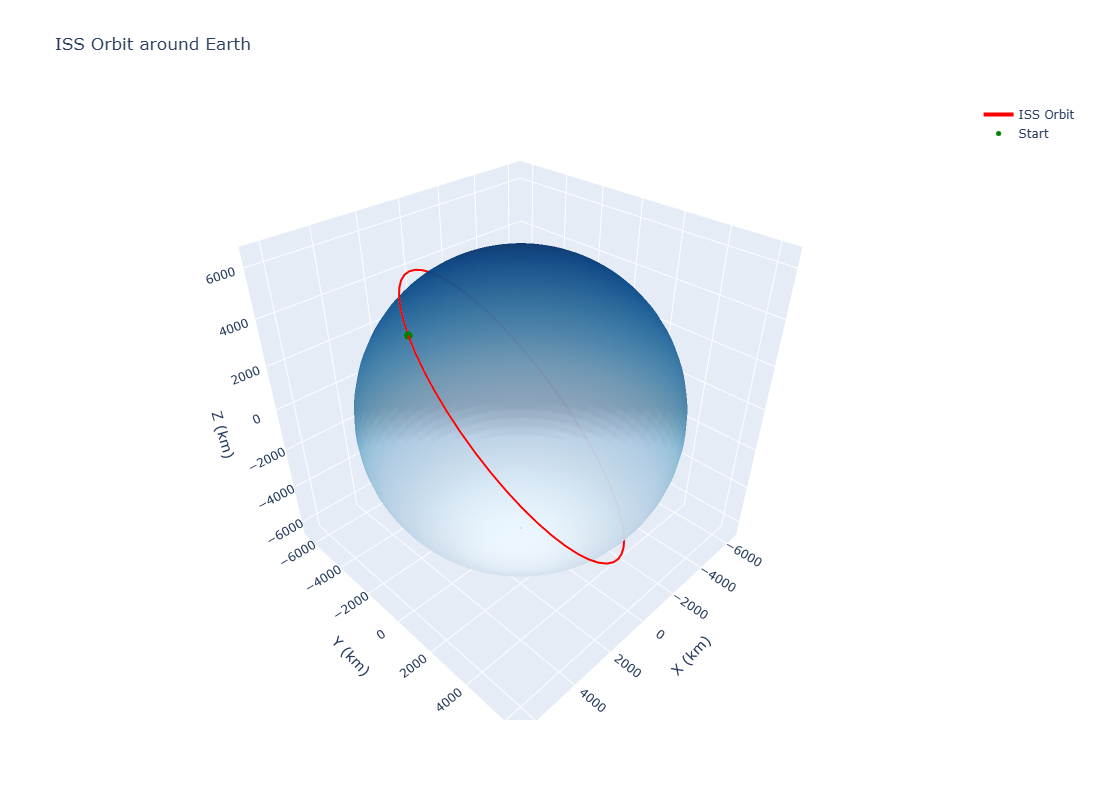

In [132]:
# let's plot!
x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]

fig = go.Figure()

# spherical earth
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x_sphere = R_E * np.outer(np.cos(u), np.sin(v))
y_sphere = R_E * np.outer(np.sin(u), np.sin(v))
z_sphere = R_E * np.outer(np.ones(np.size(u)), np.cos(v))

fig.add_trace(go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere, 
    colorscale='Blues', 
    showscale=False, 
    opacity=0.8,
    hoverinfo='skip',
    showlegend=False,
    contours=dict(
        x=dict(highlight=False),
        y=dict(highlight=False),
        z=dict(highlight=False)  
    ) # this disables annoying highlighting of the sphere
))

# ISS trajectory
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z, 
    mode='lines', 
    line=dict(color='red', width=4),
    name='ISS Orbit',
    hovertemplate='<b>ISS Position</b><br>X: %{x:.2f} km<br>Y: %{y:.2f} km<br>Z: %{z:.2f} km<extra></extra>'
))

# starting point
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers',
    marker=dict(size=5, color='green'),
    name='Start',
    hoverinfo='name'
))

# layout config
fig.update_layout(
    scene=dict(
        xaxis_title='X (km)',
        yaxis_title='Y (km)',
        zaxis_title='Z (km)',
        aspectmode='data',  # Equal aspect ratio
    ),
    title='ISS Orbit around Earth',
    showlegend=True,
    width=800, 
    height=800
)

fig.show()